In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 1. Choose a classification dataset and normalize features.

In [57]:
df = pd.read_csv('Datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [59]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [60]:
df.select_dtypes('number').columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [61]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [63]:
df.drop('Id', axis = 1, inplace = True)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

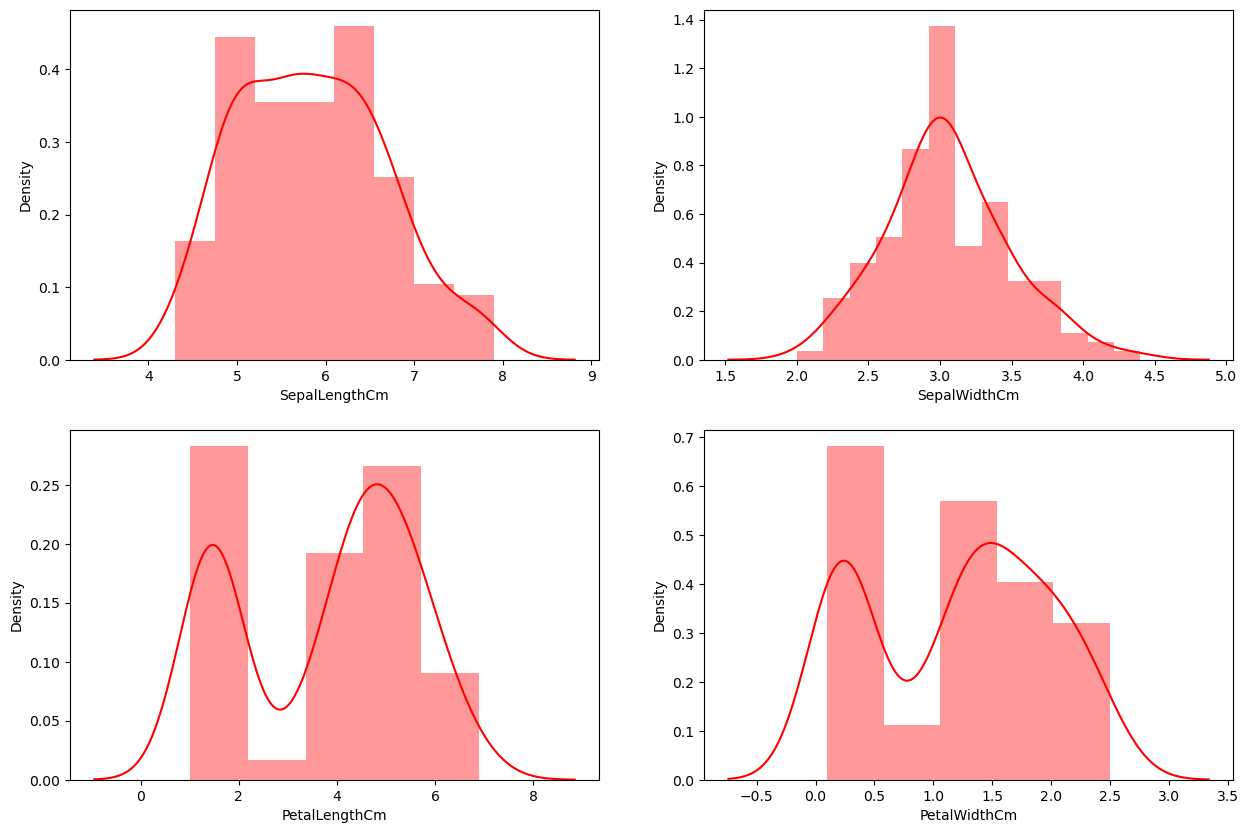

In [64]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(df.select_dtypes('number').columns, 1):
    plt.subplot(2, 2, i)
    sns.distplot(df[col], color='r')
plt.show()

In [65]:
# Normalizing the numrical features
for col in df.select_dtypes('number').columns:
    df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())

df.select_dtypes('number')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


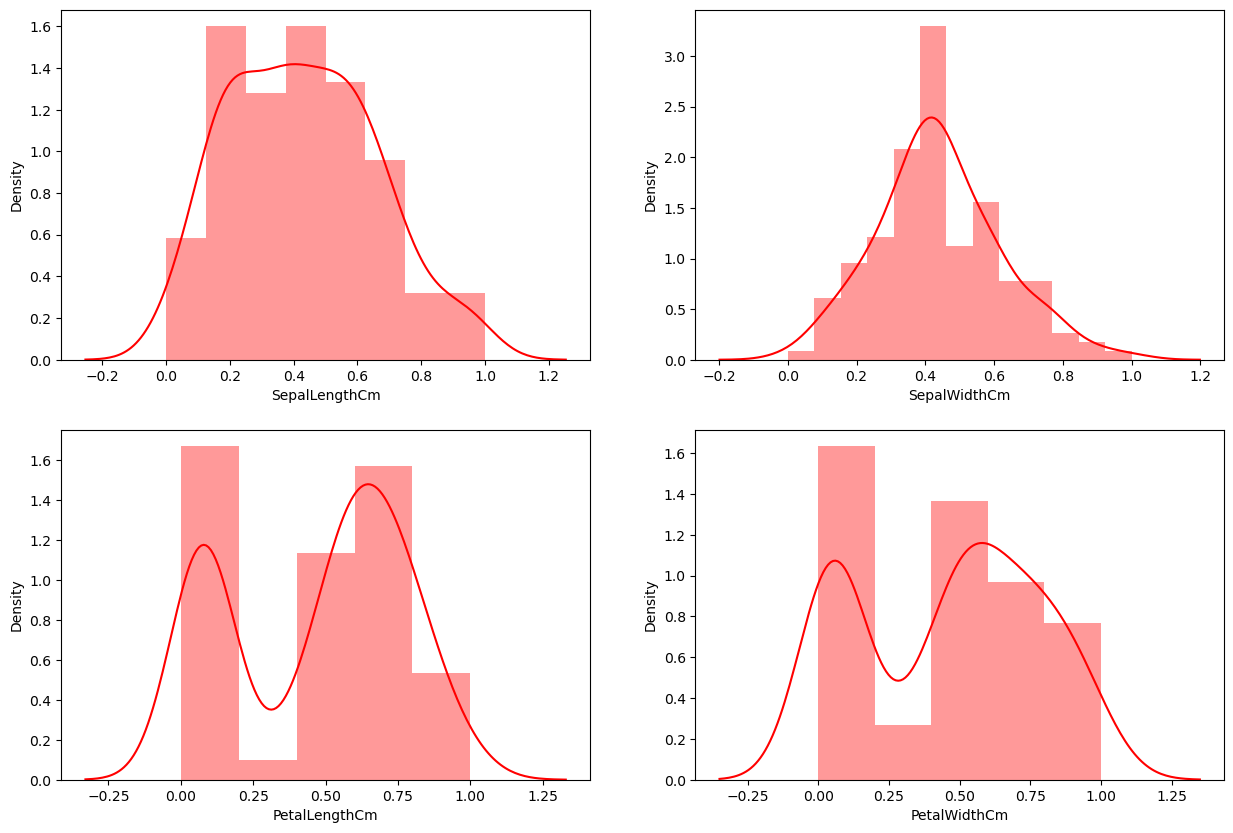

In [66]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(df.select_dtypes('number').columns, 1):
    plt.subplot(2, 2, i)
    sns.distplot(df[col], color='r')
plt.show()

# 2. Use KNeighborsClassifier from sklearn.

In [67]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [68]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['Species'] = encoder.fit_transform(df[['Species']]).astype('int')
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [69]:
encoder.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

In [70]:
X = df.drop('Species', axis = 1)
y = df['Species']

In [71]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [72]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier

KNeighborsClassifier()

In [75]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [77]:
classifier.feature_names_in_

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

In [78]:
classifier.n_neighbors

5

In [79]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(
    f"Classification Report:\n{classification_report(y_test, y_pred)}\n",
    f"Accuracy: {accuracy_score(y_test, y_pred)}\n",
    f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}"
)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

 Accuracy: 1.0
 Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 3. Experiment with different values of K.

In [80]:
clf = KNeighborsClassifier()

In [81]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': [5, 10, 15, 20, 1, 2, 30, 6, 8, 9]
}
grid = GridSearchCV(clf, param_grid=params, cv=5, verbose=3, scoring = 'accuracy')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=5;, score=0.958 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;, score=1.000 total time=   0.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.875 total time=   0.0s
[CV 4/5] END .....................n_neighbors=5;, score=1.000 total time=   0.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.958 total time=   0.0s
[CV 1/5] END ....................n_neighbors=10;, score=0.958 total time=   0.0s
[CV 2/5] END ....................n_neighbors=10;, score=1.000 total time=   0.0s
[CV 3/5] END ....................n_neighbors=10;, score=0.958 total time=   0.0s
[CV 4/5] END ....................n_neighbors=10;, score=1.000 total time=   0.0s
[CV 5/5] END ....................n_neighbors=10;, score=0.958 total time=   0.0s
[CV 1/5] END ....................n_neighbors=15;, score=0.958 total time=   0.0s
[CV 2/5] END ....................n_neighbors=15;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 1, 2, 30, 6, 8, 9]},
             scoring='accuracy', verbose=3)

In [82]:
y_pred = grid.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# 4. Evaluate model using accuracy, confusion matrix.

In [83]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 1, 2, 30, 6, 8, 9]},
             scoring='accuracy', verbose=3)>

In [84]:
grid.best_params_

{'n_neighbors': 10}

In [85]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(
    f"Classification Report:\n{classification_report(y_test, y_pred)}\n",
    f"Accuracy: {accuracy_score(y_test, y_pred)}\n",
    f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}"
)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

 Accuracy: 1.0
 Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 5. Visualize decision boundaries.

In [86]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

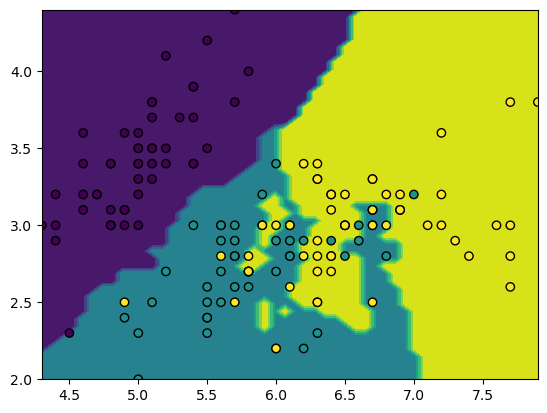

In [89]:
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay

iris = load_iris()
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = KNeighborsClassifier().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
display.ax_.scatter(
    iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black"
)
plt.show()